In [28]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [29]:
# import data into pandas
df3 = pd.read_csv('Results.csv' , sep=';' , header=None)
df3.columns = df3.iloc[0]
df3=pd.DataFrame(df3)
df3=df3.drop(df3.index[0])
# check records
df3

/Users/archeanlabs/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


0     id_audiogramme seuil_125 seuil_250 seuil_500 seuil_750 seuil_1000  \
1                  1         0         0         0         0         15   
2                  1         0         0         0         0         15   
3                  1         0         0         0         0         15   
4                  1         0         0         0         0         15   
5                  1         0         0         0         0         15   
...              ...       ...       ...       ...       ...        ...   
79996           5000        90        90        90        90         70   
79997           5000        90        90        90        90         70   
79998           5000        90        90        90        90         70   
79999           5000        90        90        90        90         70   
80000           5000        90        90        90        90         70   

0     seuil_1500 seuil_2000 seuil_3000 seuil_4000 seuil_6000 seuil_8000  \
1             25         35         25         30         20         20   
2             25         35         25         30         20         20   
3             25         35         25         30         20         20   
4             25         35         25         30         20         20   
5             25         35         25         30         20         20   
...          ...        ...        ...        ...        ...        ...   
79996         50         45         25          5         10         25   
79997         50         45         25          5         10         25   
79998         50         45         25          5         10         25   
79999         50         45         25          5         10         25   
80000         50         45         25          5         10         25   

0     seuil_10000 phoneme_cible phoneme_reconnu phoneme_correct  \
1               0             t               p               0   
2               0             b               b               1   
3               0             Z               Z               1   
4               0             m               m               1   
5               0             S               S               1   
...           ...           ...             ...             ...   
79996           5             p               S               0   
79997           5             z               s               0   
79998           5             v               S               0   
79999           5             s               s               1   
80000           5             R               S               0   

0                             erreurs_phono  
1                                [-coronal]  
2                                       NaN  
3                                       NaN  
4                                       NaN  
5                                       NaN  
...                                     ...  
79996  [+continu#+coronal#+haut#-anterieur]  
79997                              [-voise]  
79998    [-voise#+coronal#+haut#-anterieur]  
79999                                   NaN  
80000    [-sonant#-voise#+coronal#-arriere]  

[80000 rows x 17 columns]

In [31]:
# check columns with missing values
df3.isnull().sum()
#df3.dtypes

0
id_audiogramme         0
seuil_125              0
seuil_250              0
seuil_500              0
seuil_750              0
seuil_1000             0
seuil_1500             0
seuil_2000             0
seuil_3000             0
seuil_4000             0
seuil_6000             0
seuil_8000             0
seuil_10000            0
phoneme_cible          0
phoneme_reconnu        0
phoneme_correct        0
erreurs_phono      21379
dtype: int64

In [32]:
df3[["seuil_125","seuil_250","seuil_500","seuil_750","seuil_1000","seuil_1500","seuil_2000",
    "seuil_3000","seuil_4000","seuil_6000","seuil_8000","seuil_10000",
    "phoneme_correct"]] = df3[["seuil_125","seuil_250","seuil_500","seuil_750","seuil_1000","seuil_1500","seuil_2000",
    "seuil_3000","seuil_4000","seuil_6000","seuil_8000","seuil_10000",
    "phoneme_correct"]].apply(pd.to_numeric)
df3.dtypes

0
id_audiogramme     object
seuil_125           int64
seuil_250           int64
seuil_500           int64
seuil_750           int64
seuil_1000          int64
seuil_1500          int64
seuil_2000          int64
seuil_3000          int64
seuil_4000          int64
seuil_6000          int64
seuil_8000          int64
seuil_10000         int64
phoneme_cible      object
phoneme_reconnu    object
phoneme_correct     int64
erreurs_phono      object
dtype: object

In [33]:
df3 = df3.rename({'seuil_125': '125', 'seuil_250': '250','seuil_500': '500','seuil_750': '750','seuil_1000': '1000','seuil_1500': '1500','seuil_2000': '2000','seuil_3000': '3000'
                    ,'seuil_4000': '4000','seuil_6000': '6000','seuil_8000': '8000','seuil_10000': '10000'}, axis=1)

In [34]:
#Feature manipulation
df3["erreurs_phono"] = df3.erreurs_phono.str.replace(']','')
df3["erreurs_phono"] = df3.erreurs_phono.str.replace('[','')
df3[['category1','category2','category3','category4','category5','category6','category7','category8']]=df3.erreurs_phono.str.split("#",expand=True,)
df3=df3[df3['erreurs_phono'].notna()]
df3

0     id_audiogramme  125  250  500  750  1000  1500  2000  3000  4000  ...  \
1                  1    0    0    0    0    15    25    35    25    30  ...   
7                  1    0    0    0    0    15    25    35    25    30  ...   
8                  1    0    0    0    0    15    25    35    25    30  ...   
9                  1    0    0    0    0    15    25    35    25    30  ...   
10                 1    0    0    0    0    15    25    35    25    30  ...   
...              ...  ...  ...  ...  ...   ...   ...   ...   ...   ...  ...   
79995           5000   90   90   90   90    70    50    45    25     5  ...   
79996           5000   90   90   90   90    70    50    45    25     5  ...   
79997           5000   90   90   90   90    70    50    45    25     5  ...   
79998           5000   90   90   90   90    70    50    45    25     5  ...   
80000           5000   90   90   90   90    70    50    45    25     5  ...   

0      phoneme_correct                                      erreurs_phono  \
1                    0                                           -coronal   
7                    0  +sonant#+continu#-coronal#+haut#+arriere#-ante...   
8                    0                                           -continu   
9                    0                                             +nasal   
10                   0                          -haut#-arriere#+anterieur   
...                ...                                                ...   
79995                0             -sonant#-voise#-nasal#+haut#-anterieur   
79996                0                 +continu#+coronal#+haut#-anterieur   
79997                0                                             -voise   
79998                0                   -voise#+coronal#+haut#-anterieur   
80000                0                   -sonant#-voise#+coronal#-arriere   

0      category1 category2   category3   category4   category5   category6  \
1       -coronal      None        None        None        None        None   
7        +sonant  +continu    -coronal       +haut    +arriere  -anterieur   
8       -continu      None        None        None        None        None   
9         +nasal      None        None        None        None        None   
10         -haut  -arriere  +anterieur        None        None        None   
...          ...       ...         ...         ...         ...         ...   
79995    -sonant    -voise      -nasal       +haut  -anterieur        None   
79996   +continu  +coronal       +haut  -anterieur        None        None   
79997     -voise      None        None        None        None        None   
79998     -voise  +coronal       +haut  -anterieur        None        None   
80000    -sonant    -voise    +coronal    -arriere        None        None   

0     category7 category8  
1          None      None  
7          None      None  
8          None      None  
9          None      None  
10         None      None  
...         ...       ...  
79995      None      None  
79996      None      None  
79997      None      None  
79998      None      None  
80000      None      None  

[58621 rows x 25 columns]

In [35]:
df3.columns

Index(['id_audiogramme', '125', '250', '500', '750', '1000', '1500', '2000',
       '3000', '4000', '6000', '8000', '10000', 'phoneme_cible',
       'phoneme_reconnu', 'phoneme_correct', 'erreurs_phono', 'category1',
       'category2', 'category3', 'category4', 'category5', 'category6',
       'category7', 'category8'],
      dtype='object', name=0)

In [689]:
#Feature manipulation
df3=df3.melt(id_vars=['id_audiogramme', 'phoneme_cible',
       'phoneme_reconnu', 'phoneme_correct', 'erreurs_phono', 'category1',
       'category2', 'category3', 'category4', 'category5', 'category6',
       'category7', 'category8'], 
        var_name="frequence", 
        value_name="threshold")
df3

id_audiogramme phoneme_cible phoneme_reconnu  phoneme_correct  \
0                   1             t               R                0   
1                   1             Z               z                0   
2                   1             S               s                0   
3                   1             d               R                0   
4                   1             f               p                0   
...               ...           ...             ...              ...   
141703           1000             n               f                0   
141704           1000             p               f                0   
141705           1000             z               s                0   
141706           1000             v               f                0   
141707           1000             R               v                0   

                                            erreurs_phono category1  \
0       +sonant#+continu#+voise#-coronal#+haut#+arrier...   +sonant   
1                                        -haut#+anterieur     -haut   
2                                        -haut#+anterieur     -haut   
3       +sonant#+continu#-coronal#+haut#+arriere#-ante...   +sonant   
4                                                -continu  -continu   
...                                                   ...       ...   
141703                     -sonant#-voise#-coronal#-nasal   -sonant   
141704                                           +continu  +continu   
141705                                             -voise    -voise   
141706                                             -voise    -voise   
141707                  -sonant#-haut#-arriere#+anterieur   -sonant   

         category2 category3   category4 category5   category6   category7  \
0         +continu    +voise    -coronal     +haut    +arriere  -anterieur   
1       +anterieur      None        None      None        None        None   
2       +anterieur      None        None      None        None        None   
3         +continu  -coronal       +haut  +arriere  -anterieur        None   
4             None      None        None      None        None        None   
...            ...       ...         ...       ...         ...         ...   
141703      -voise  -coronal      -nasal      None        None        None   
141704        None      None        None      None        None        None   
141705        None      None        None      None        None        None   
141706        None      None        None      None        None        None   
141707       -haut  -arriere  +anterieur      None        None        None   

       category8 frequence  threshold  
0           None       125          0  
1           None       125          0  
2           None       125          0  
3           None       125          0  
4           None       125          0  
...          ...       ...        ...  
141703      None     10000         15  
141704      None     10000         15  
141705      None     10000         15  
141706      None     10000         15  
141707      None     10000         15  

[141708 rows x 15 columns]

In [672]:
df1.dtypes

0
id_audiogramme     object
seuil_125          object
seuil_250          object
seuil_500          object
seuil_750          object
seuil_1000         object
seuil_1500         object
seuil_2000         object
seuil_3000         object
seuil_4000         object
seuil_6000         object
seuil_8000         object
seuil_10000        object
phoneme_cible      object
phoneme_reconnu    object
phoneme_correct    object
erreurs_phono      object
dtype: object

In [692]:
df3.fillna('', inplace=True)
df_new=(df3.category1 + '|' + df3.category2 + '|' +df3.category3 + '|' +df3.category4 + '|' + df3.category5 + '|' + df3.category6 + '|' + df3.category7 + '|' +df3.category8).str.get_dummies()
df_new

+anterieur  +arriere  +continu  +coronal  +haut  +nasal  +sonant  \
0                0         1         1         0      1       0        1   
1                1         0         0         0      0       0        0   
2                1         0         0         0      0       0        0   
3                0         1         1         0      1       0        1   
4                0         0         0         0      0       0        0   
...            ...       ...       ...       ...    ...     ...      ...   
141703           0         0         0         0      0       0        0   
141704           0         0         1         0      0       0        0   
141705           0         0         0         0      0       0        0   
141706           0         0         0         0      0       0        0   
141707           1         0         0         0      0       0        0   

        +voise  -anterieur  -arriere  -continu  -coronal  -haut  -nasal  \
0            1           1         0         0         1      0       0   
1            0           0         0         0         0      1       0   
2            0           0         0         0         0      1       0   
3            0           1         0         0         1      0       0   
4            0           0         0         1         0      0       0   
...        ...         ...       ...       ...       ...    ...     ...   
141703       0           0         0         0         1      0       1   
141704       0           0         0         0         0      0       0   
141705       0           0         0         0         0      0       0   
141706       0           0         0         0         0      0       0   
141707       0           0         1         0         0      1       0   

        -sonant  -voise  
0             0       0  
1             0       0  
2             0       0  
3             0       0  
4             0       0  
...         ...     ...  
141703        1       1  
141704        0       0  
141705        0       1  
141706        0       1  
141707        1       0  

[141708 rows x 16 columns]

In [693]:
#df3.fillna('', inplace=True)
#df_new=(df3.category1 + '|' + df3.category2 + '|' +df3.category3 + '|' +df3.category4 + '|' + df3.category5 + '|' + df3.category6 + '|' + df3.category7 + '|' +df3.category8).str.get_dummies()
#df_new
result = pd.concat([df3, df_new], axis=1, ignore_index=False)
result

id_audiogramme phoneme_cible phoneme_reconnu  phoneme_correct  \
0                   1             t               R                0   
1                   1             Z               z                0   
2                   1             S               s                0   
3                   1             d               R                0   
4                   1             f               p                0   
...               ...           ...             ...              ...   
141703           1000             n               f                0   
141704           1000             p               f                0   
141705           1000             z               s                0   
141706           1000             v               f                0   
141707           1000             R               v                0   

                                            erreurs_phono category1  \
0       +sonant#+continu#+voise#-coronal#+haut#+arrier...   +sonant   
1                                        -haut#+anterieur     -haut   
2                                        -haut#+anterieur     -haut   
3       +sonant#+continu#-coronal#+haut#+arriere#-ante...   +sonant   
4                                                -continu  -continu   
...                                                   ...       ...   
141703                     -sonant#-voise#-coronal#-nasal   -sonant   
141704                                           +continu  +continu   
141705                                             -voise    -voise   
141706                                             -voise    -voise   
141707                  -sonant#-haut#-arriere#+anterieur   -sonant   

         category2 category3   category4 category5  ... +sonant +voise  \
0         +continu    +voise    -coronal     +haut  ...       1      1   
1       +anterieur                                  ...       0      0   
2       +anterieur                                  ...       0      0   
3         +continu  -coronal       +haut  +arriere  ...       1      0   
4                                                   ...       0      0   
...            ...       ...         ...       ...  ...     ...    ...   
141703      -voise  -coronal      -nasal            ...       0      0   
141704                                              ...       0      0   
141705                                              ...       0      0   
141706                                              ...       0      0   
141707       -haut  -arriere  +anterieur            ...       0      0   

       -anterieur -arriere  -continu  -coronal  -haut  -nasal  -sonant  -voise  
0               1        0         0         1      0       0        0       0  
1               0        0         0         0      1       0        0       0  
2               0        0         0         0      1       0        0       0  
3               1        0         0         1      0       0        0       0  
4               0        0         1         0      0       0        0       0  
...           ...      ...       ...       ...    ...     ...      ...     ...  
141703          0        0         0         1      0       1        1       1  
141704          0        0         0         0      0       0        0       0  
141705          0        0         0         0      0       0        0       1  
141706          0        0         0         0      0       0        0       1  
141707          0        1         0         0      1       0        1       0  

[141708 rows x 31 columns]

In [694]:
new3=result[['id_audiogramme', 'frequence',
       'threshold', '+anterieur', '+arriere', '+continu', '+coronal', '+haut',
       '+nasal', '+sonant', '+voise', '-anterieur', '-arriere', '-continu',
       '-coronal', '-haut', '-nasal', '-sonant', '-voise']]
new3

id_audiogramme frequence  threshold  +anterieur  +arriere  +continu  \
0                   1       125          0           0         1         1   
1                   1       125          0           1         0         0   
2                   1       125          0           1         0         0   
3                   1       125          0           0         1         1   
4                   1       125          0           0         0         0   
...               ...       ...        ...         ...       ...       ...   
141703           1000     10000         15           0         0         0   
141704           1000     10000         15           0         0         1   
141705           1000     10000         15           0         0         0   
141706           1000     10000         15           0         0         0   
141707           1000     10000         15           1         0         0   

        +coronal  +haut  +nasal  +sonant  +voise  -anterieur  -arriere  \
0              0      1       0        1       1           1         0   
1              0      0       0        0       0           0         0   
2              0      0       0        0       0           0         0   
3              0      1       0        1       0           1         0   
4              0      0       0        0       0           0         0   
...          ...    ...     ...      ...     ...         ...       ...   
141703         0      0       0        0       0           0         0   
141704         0      0       0        0       0           0         0   
141705         0      0       0        0       0           0         0   
141706         0      0       0        0       0           0         0   
141707         0      0       0        0       0           0         1   

        -continu  -coronal  -haut  -nasal  -sonant  -voise  
0              0         1      0       0        0       0  
1              0         0      1       0        0       0  
2              0         0      1       0        0       0  
3              0         1      0       0        0       0  
4              1         0      0       0        0       0  
...          ...       ...    ...     ...      ...     ...  
141703         0         1      0       1        1       1  
141704         0         0      0       0        0       0  
141705         0         0      0       0        0       1  
141706         0         0      0       0        0       1  
141707         0         0      1       0        1       0  

[141708 rows x 19 columns]

In [695]:
new3=pd.melt(new3, id_vars =['id_audiogramme', 'frequence',
       'threshold'], value_vars =['+anterieur', '+arriere', '+continu', '+coronal', '+haut',
       '+nasal', '+sonant', '+voise', '-anterieur', '-arriere', '-continu',
       '-coronal', '-haut', '-nasal', '-sonant', '-voise'],
              var_name ='categorie', value_name ='erreur')
new3

id_audiogramme frequence  threshold   categorie  erreur
0                    1       125          0  +anterieur       0
1                    1       125          0  +anterieur       1
2                    1       125          0  +anterieur       1
3                    1       125          0  +anterieur       0
4                    1       125          0  +anterieur       0
...                ...       ...        ...         ...     ...
2267323           1000     10000         15      -voise       1
2267324           1000     10000         15      -voise       0
2267325           1000     10000         15      -voise       1
2267326           1000     10000         15      -voise       1
2267327           1000     10000         15      -voise       0

[2267328 rows x 5 columns]

In [417]:
new3.isnull().sum()

id_audiogramme    0
frequence         0
threshold         0
categorie         0
erreur            0
dtype: int64

In [460]:
result

id_audiogramme phoneme_cible phoneme_reconnu  phoneme_correct  \
0                   1             Z               b                0   
1                   1             m               n                0   
2                   1             S               p                0   
3                   1             d               b                0   
4                   1             f               p                0   
...               ...           ...             ...              ...   
102427            998             l               S                0   
102428            998             k               S                0   
102429            998             n               f                0   
102430            998             p               f                0   
102431            998             R               s                0   

                                            erreurs_phono category1 category2  \
0                      -continu#-coronal#-haut#+anterieur  -continu  -coronal   
1                                                +coronal  +coronal             
2                      -continu#-coronal#-haut#+anterieur  -continu  -coronal   
3                                                -coronal  -coronal             
4                                                -continu  -continu             
...                                                   ...       ...       ...   
102427                    -sonant#-voise#+haut#-anterieur   -sonant    -voise   
102428                         +continu#+coronal#-arriere  +continu  +coronal   
102429                     -sonant#-voise#-coronal#-nasal   -sonant    -voise   
102430                                           +continu  +continu             
102431  -sonant#-voise#+coronal#-haut#-arriere#+anterieur   -sonant    -voise   

       category3   category4 category5  ... +sonant +voise -anterieur  \
0          -haut  +anterieur            ...       0      0          0   
1                                       ...       0      0          0   
2          -haut  +anterieur            ...       0      0          0   
3                                       ...       0      0          0   
4                                       ...       0      0          0   
...          ...         ...       ...  ...     ...    ...        ...   
102427     +haut  -anterieur            ...       0      0          1   
102428  -arriere                        ...       0      0          0   
102429  -coronal      -nasal            ...       0      0          0   
102430                                  ...       0      0          0   
102431  +coronal       -haut  -arriere  ...       0      0          0   

       -arriere  -continu  -coronal  -haut  -nasal  -sonant  -voise  
0             0         1         1      1       0        0       0  
1             0         0         0      0       0        0       0  
2             0         1         1      1       0        0       0  
3             0         0         1      0       0        0       0  
4             0         1         0      0       0        0       0  
...         ...       ...       ...    ...     ...      ...     ...  
102427        0         0         0      0       0        1       1  
102428        1         0         0      0       0        0       0  
102429        0         0         1      0       1        1       1  
102430        0         0         0      0       0        0       0  
102431        1         0         0      1       0        1       1  

[102432 rows x 31 columns]

In [461]:
#Feature manipulation
new3=result.melt(id_vars=['id_audiogramme', 'phoneme_cible', 'phoneme_reconnu', 'phoneme_correct',
       'erreurs_phono', 'category1', 'category2', 'category3', 'category4',
       'category5', 'category6', 'category7', 'category8', 'frequence',
       'threshold'], 
        var_name="category", 
        value_name="erreur")
new3

id_audiogramme phoneme_cible phoneme_reconnu  phoneme_correct  \
0                    1             Z               b                0   
1                    1             m               n                0   
2                    1             S               p                0   
3                    1             d               b                0   
4                    1             f               p                0   
...                ...           ...             ...              ...   
1638907            998             l               S                0   
1638908            998             k               S                0   
1638909            998             n               f                0   
1638910            998             p               f                0   
1638911            998             R               s                0   

                                             erreurs_phono category1  \
0                       -continu#-coronal#-haut#+anterieur  -continu   
1                                                 +coronal  +coronal   
2                       -continu#-coronal#-haut#+anterieur  -continu   
3                                                 -coronal  -coronal   
4                                                 -continu  -continu   
...                                                    ...       ...   
1638907                    -sonant#-voise#+haut#-anterieur   -sonant   
1638908                         +continu#+coronal#-arriere  +continu   
1638909                     -sonant#-voise#-coronal#-nasal   -sonant   
1638910                                           +continu  +continu   
1638911  -sonant#-voise#+coronal#-haut#-arriere#+anterieur   -sonant   

        category2 category3   category4 category5   category6 category7  \
0        -coronal     -haut  +anterieur                                   
1                                                                         
2        -coronal     -haut  +anterieur                                   
3                                                                         
4                                                                         
...           ...       ...         ...       ...         ...       ...   
1638907    -voise     +haut  -anterieur                                   
1638908  +coronal  -arriere                                               
1638909    -voise  -coronal      -nasal                                   
1638910                                                                   
1638911    -voise  +coronal       -haut  -arriere  +anterieur             

        category8 frequence  threshold    category  erreur  
0                       125          0  +anterieur       1  
1                       125          0  +anterieur       0  
2                       125          0  +anterieur       1  
3                       125          0  +anterieur       0  
4                       125          0  +anterieur       0  
...           ...       ...        ...         ...     ...  
1638907               10000         15      -voise       1  
1638908               10000         15      -voise       0  
1638909               10000         15      -voise       1  
1638910               10000         15      -voise       0  
1638911               10000         15      -voise       1  

[1638912 rows x 17 columns]

In [313]:
#df3=df3.replace(r'^\s*$', np.nan, regex=True)
#df3=df3[df3['trait'].notna()]
#df3

id_audiogramme  125  250  500  750  1000  1500  2000  3000  4000  6000  \
0                  1    0    0    0   20    30    50    65    75    80    85   
1                  1    0    0    0   20    30    50    65    75    80    85   
2                  1    0    0    0   20    30    50    65    75    80    85   
3                  1    0    0    0   20    30    50    65    75    80    85   
4                  1    0    0    0   20    30    50    65    75    80    85   
...              ...  ...  ...  ...  ...   ...   ...   ...   ...   ...   ...   
66134            799   70   50   30   35    40    40    20    10     0    20   
66310            815   70   65   45   30    10    15    15    30    30    50   
66348            819   70   65   75   70    45    20    20    40    45    25   
67176            896   80   70   45   30    15    10     5    25    35    40   
67351            912   80   80   85   60    55    30    25    45    20    15   

       8000  10000 phoneme_cible phoneme_reconnu  phoneme_correct  \
0        60     40             Z               b                0   
1        60     40             m               n                0   
2        60     40             S               p                0   
3        60     40             d               b                0   
4        60     40             f               p                0   
...     ...    ...           ...             ...              ...   
66134    15     30             n               k                0   
66310    35     35             n               k                0   
66348    45     20             n               k                0   
67176    50     50             n               k                0   
67351    20     35             n               k                0   

                                           erreurs_phono   category  \
0                     -continu#-coronal#-haut#+anterieur  category1   
1                                               +coronal  category1   
2                     -continu#-coronal#-haut#+anterieur  category1   
3                                               -coronal  category1   
4                                               -continu  category1   
...                                                  ...        ...   
66134  -sonant#-continu#-voise#-coronal#-nasal#+haut#...  category8   
66310  -sonant#-continu#-voise#-coronal#-nasal#+haut#...  category8   
66348  -sonant#-continu#-voise#-coronal#-nasal#+haut#...  category8   
67176  -sonant#-continu#-voise#-coronal#-nasal#+haut#...  category8   
67351  -sonant#-continu#-voise#-coronal#-nasal#+haut#...  category8   

            trait  
0        -continu  
1        +coronal  
2        -continu  
3        -coronal  
4        -continu  
...           ...  
66134  -anterieur  
66310  -anterieur  
66348  -anterieur  
67176  -anterieur  
67351  -anterieur  

[24542 rows x 19 columns]

In [671]:
new3

id_audiogramme  frequence  threshold    category  erreur mot
0                    1      0.125          0  +anterieur       1  Zb
1                    1      0.125          0  +anterieur       0  mn
2                    1      0.125          0  +anterieur       1  Sp
3                    1      0.125          0  +anterieur       0  db
4                    1      0.125          0  +anterieur       0  fp
...                ...        ...        ...         ...     ...  ..
1638907            998     10.000         15      -voise       1  lS
1638908            998     10.000         15      -voise       0  kS
1638909            998     10.000         15      -voise       1  nf
1638910            998     10.000         15      -voise       0  pf
1638911            998     10.000         15      -voise       1  Rs

[1638912 rows x 6 columns]

In [470]:
new3=new3[['id_audiogramme' ,'frequence',
       'threshold', 'category', 'erreur', 'mot']]
new3

id_audiogramme  frequence  threshold    category  erreur mot
0                    1      0.125          0  +anterieur       1  Zb
1                    1      0.125          0  +anterieur       0  mn
2                    1      0.125          0  +anterieur       1  Sp
3                    1      0.125          0  +anterieur       0  db
4                    1      0.125          0  +anterieur       0  fp
...                ...        ...        ...         ...     ...  ..
1638907            998     10.000         15      -voise       1  lS
1638908            998     10.000         15      -voise       0  kS
1638909            998     10.000         15      -voise       1  nf
1638910            998     10.000         15      -voise       0  pf
1638911            998     10.000         15      -voise       1  Rs

[1638912 rows x 6 columns]

In [696]:
new3[["frequence"]] = new3[["frequence"]].apply(pd.to_numeric)
new3

id_audiogramme  frequence  threshold   categorie  erreur
0                    1        125          0  +anterieur       0
1                    1        125          0  +anterieur       1
2                    1        125          0  +anterieur       1
3                    1        125          0  +anterieur       0
4                    1        125          0  +anterieur       0
...                ...        ...        ...         ...     ...
2267323           1000      10000         15      -voise       1
2267324           1000      10000         15      -voise       0
2267325           1000      10000         15      -voise       1
2267326           1000      10000         15      -voise       1
2267327           1000      10000         15      -voise       0

[2267328 rows x 5 columns]

In [701]:
#new3['mot'] =new3[['phoneme_cible', 'phoneme_reconnu']].apply(lambda x : '{}{}'.format(x[0],x[1]), axis=1)
#new3['frequence']=new3['frequence']/1000
new3['trait']=new3['categorie'].str[1:]

In [700]:
new3.loc[new3["categorie"] == "+voise", 'exemple'] = "+voise (S->Z)"
new3.loc[new3["categorie"] == "-voise", 'exemple'] = "-voise (Z->S)"
new3.loc[new3["categorie"] == "+coronal", 'exemple'] = "+coronal (b->d)"
new3.loc[new3["categorie"] == "-coronal", 'exemple'] = "-coronal (d->b)"
new3.loc[new3["categorie"] == "+continu", 'exemple'] = "+continu (b->v)"
new3.loc[new3["categorie"] == "-continu", 'exemple'] = "-continu (f->p)"
new3.loc[new3["categorie"] == "+nasal", 'exemple'] = "+nasal (l->n)"
new3.loc[new3["categorie"] == "-nasal", 'exemple'] = "-nasal (n->l)"
new3.loc[new3["categorie"] == "+sonant", 'exemple'] = "+sonant ['+continu'] (d->l)"
new3.loc[new3["categorie"] == "-sonant", 'exemple'] = "-sonant  (l->Z)"
new3.loc[new3["categorie"] == "+haut", 'exemple'] = "+haut ['+arriere,-anterieur'] (b->g)"
new3.loc[new3["categorie"] == "-haut", 'exemple'] = "-haut ['+anterieur'] (S->s)"
new3.loc[new3["categorie"] == "+anterieur", 'exemple'] = "+anterieur ['-haut,+voise'] (S->z)"
new3.loc[new3["categorie"] == "-anterieur", 'exemple'] = "-anterieur ['+haut,+continu'] (d->Z)"
new3.loc[new3["categorie"] == "+arriere", 'exemple'] = "+arriere ['-coronal,-continu'] (S->k)"
new3.loc[new3["categorie"] == "-arriere", 'exemple'] = "-arriere ['+continu,+coronal'] (g->Z)"

In [699]:
new3 = new3.rename({"threshold":"seuil"}, axis=1)

In [718]:
new4

id_audiogramme  frequence  seuil   categorie  erreur  \
15                   3      0.125      0  +anterieur       0   
16                   3      0.125      0  +anterieur       0   
17                   3      0.125      0  +anterieur       0   
18                   3      0.125      0  +anterieur       0   
19                   3      0.125      0  +anterieur       0   
...                ...        ...    ...         ...     ...   
2262807            679     10.000     75      -voise       0   
2262808            679     10.000     75      -voise       1   
2262809            679     10.000     75      -voise       1   
2262810            679     10.000     75      -voise       0   
2262811            679     10.000     75      -voise       0   

                                    exemple      trait  
15       +anterieur ['-haut,+voise'] (S->z)  anterieur  
16       +anterieur ['-haut,+voise'] (S->z)  anterieur  
17       +anterieur ['-haut,+voise'] (S->z)  anterieur  
18       +anterieur ['-haut,+voise'] (S->z)  anterieur  
19       +anterieur ['-haut,+voise'] (S->z)  anterieur  
...                                     ...        ...  
2262807                       -voise (Z->S)      voise  
2262808                       -voise (Z->S)      voise  
2262809                       -voise (Z->S)      voise  
2262810                       -voise (Z->S)      voise  
2262811                       -voise (Z->S)      voise  

[34176 rows x 7 columns]

In [754]:
voise=new4.loc[new4['trait'] == 'voise']
coronal=new4.loc[new4['trait'] == 'coronal']
continu=new4.loc[new4['trait'] == 'continu']
haut=new4.loc[new4['trait'] == 'haut']
nasal=new4.loc[new4['trait'] == 'nasal']
sonant=new4.loc[new4['trait'] == 'sonant']
anterieur=new4.loc[new4['trait'] == 'anterieur']
arriere=new4.loc[new4['trait'] == 'arriere']

In [755]:
voise

id_audiogramme  frequence  seuil categorie  erreur        exemple  \
991983               4      0.125      0    +voise       1  +voise (S->Z)   
992096              19      0.125      0    +voise       1  +voise (S->Z)   
992100              19      0.125      0    +voise       1  +voise (S->Z)   
992111              21      0.125      0    +voise       1  +voise (S->Z)   
992117              21      0.125      0    +voise       1  +voise (S->Z)   
...                ...        ...    ...       ...     ...            ...   
2262386            642     10.000     50    -voise       1  -voise (Z->S)   
2262799            679     10.000     75    -voise       1  -voise (Z->S)   
2262803            679     10.000     75    -voise       1  -voise (Z->S)   
2262808            679     10.000     75    -voise       1  -voise (Z->S)   
2262809            679     10.000     75    -voise       1  -voise (Z->S)   

         trait  
991983   voise  
992096   voise  
992100   voise  
992111   voise  
992117   voise  
...        ...  
2262386  voise  
2262799  voise  
2262803  voise  
2262808  voise  
2262809  voise  

[7536 rows x 7 columns]

In [750]:
new4=new4.loc[(new4['erreur'] == 1) ]

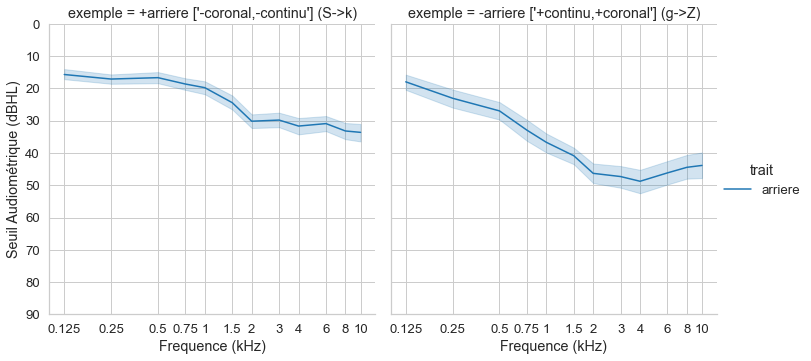

In [763]:
# Data exploration using visual analysis
ticks=[.125,.25,.5,.75,1,1.5,2,3,4,6,8,10]
labels = [i for i in ticks]
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linew3idth": 4})
g = sns.relplot(
    data=arriere,
    x="frequence", y="seuil", col="exemple", hue="trait",
    kind="line")
g.set_axis_labels("Frequence (kHz)", "Seuil Audiométrique (dBHL)")
g.set(ylim=(90,0),xscale="log",xticks = ticks,xticklabels = labels)
g.savefig('arriere3.png', dpi=200, bbox_inches='tight')

In [338]:
sns.relplot(x="frequence", y="seuil",hue="id_audiogramme",col="trait",
            ci=None, kind="line", data=new3);

In [423]:
new3.to_csv('new4.csv') 

In [706]:
new3.groupby(['categorie',"erreur",'frequence']).mean()

seuil
categorie  erreur frequence           
+anterieur 0      0.125      43.819934
                  0.250      43.569208
                  0.500      42.699959
                  0.750      41.768545
                  1.000      40.640282
...                                ...
-voise     1      3.000      36.892872
                  4.000      36.541482
                  6.000      36.626057
                  8.000      35.868909
                  10.000     36.171969

[384 rows x 1 columns]

In [709]:
new4

id_audiogramme  frequence  seuil   categorie  erreur  \
15                   3      0.125      0  +anterieur       0   
16                   3      0.125      0  +anterieur       0   
17                   3      0.125      0  +anterieur       0   
18                   3      0.125      0  +anterieur       0   
19                   3      0.125      0  +anterieur       0   
...                ...        ...    ...         ...     ...   
2262807            679     10.000     75      -voise       0   
2262808            679     10.000     75      -voise       1   
2262809            679     10.000     75      -voise       1   
2262810            679     10.000     75      -voise       0   
2262811            679     10.000     75      -voise       0   

                                    exemple      trait  
15       +anterieur ['-haut,+voise'] (S->z)  anterieur  
16       +anterieur ['-haut,+voise'] (S->z)  anterieur  
17       +anterieur ['-haut,+voise'] (S->z)  anterieur  
18       +anterieur ['-haut,+voise'] (S->z)  anterieur  
19       +anterieur ['-haut,+voise'] (S->z)  anterieur  
...                                     ...        ...  
2262807                       -voise (Z->S)      voise  
2262808                       -voise (Z->S)      voise  
2262809                       -voise (Z->S)      voise  
2262810                       -voise (Z->S)      voise  
2262811                       -voise (Z->S)      voise  

[34176 rows x 7 columns]

In [740]:
#Data exploration using numerical analysis
#df5 = new3[['frequence', 'seuil','trait_phonetique']]
#new3.erreur=new3.erreur.astype('str')
#new3.dtypes
df5=new4.groupby(['categorie',"erreur",'frequence']).mean()
df5

seuil
categorie  erreur frequence           
+anterieur 0      0.125      16.816479
                  0.250      19.625468
                  0.500      20.947566
                  0.750      23.715356
                  1.000      25.629213
...                                ...
-voise     1      3.000      31.589474
                  4.000      34.568421
                  6.000      34.389474
                  8.000      34.600000
                  10.000     35.715789

[384 rows x 1 columns]

In [741]:
df5.to_csv('df6.csv') 
df5=pd.read_csv('df6.csv' , sep=',' , header=None)
df5.columns = df5.iloc[0]
df5=pd.DataFrame(df5)
df5=df5.drop(df5.index[0])
df5

0     categorie erreur frequence               seuil
1    +anterieur      0     0.125  16.816479400749063
2    +anterieur      0      0.25  19.625468164794007
3    +anterieur      0       0.5   20.94756554307116
4    +anterieur      0      0.75  23.715355805243444
5    +anterieur      0       1.0  25.629213483146067
..          ...    ...       ...                 ...
380      -voise      1       3.0  31.589473684210525
381      -voise      1       4.0   34.56842105263158
382      -voise      1       6.0   34.38947368421053
383      -voise      1       8.0                34.6
384      -voise      1      10.0   35.71578947368421

[384 rows x 4 columns]

In [742]:
df5 = df5.rename({'threshold': 'seuil'}, axis=1)
df5.dtypes

0
categorie    object
erreur       object
frequence    object
seuil        object
dtype: object

In [743]:
df5[['frequence', 'seuil']] = df5[['frequence', 'seuil']].apply(pd.to_numeric)
df5.dtypes

0
categorie     object
erreur        object
frequence    float64
seuil        float64
dtype: object

In [744]:
df5['erreur_phonetique']=df5['categorie'].map(str)+df5['erreur'].map(str)
df5

0     categorie erreur  frequence      seuil erreur_phonetique
1    +anterieur      0      0.125  16.816479       +anterieur0
2    +anterieur      0      0.250  19.625468       +anterieur0
3    +anterieur      0      0.500  20.947566       +anterieur0
4    +anterieur      0      0.750  23.715356       +anterieur0
5    +anterieur      0      1.000  25.629213       +anterieur0
..          ...    ...        ...        ...               ...
380      -voise      1      3.000  31.589474           -voise1
381      -voise      1      4.000  34.568421           -voise1
382      -voise      1      6.000  34.389474           -voise1
383      -voise      1      8.000  34.600000           -voise1
384      -voise      1     10.000  35.715789           -voise1

[384 rows x 5 columns]

In [745]:
df5_1=df5.loc[(df5['erreur'] == '1') ]

In [746]:
df5_1

0     categorie erreur  frequence      seuil erreur_phonetique
13   +anterieur      1      0.125  17.882353       +anterieur1
14   +anterieur      1      0.250  22.843137       +anterieur1
15   +anterieur      1      0.500  26.254902       +anterieur1
16   +anterieur      1      0.750  32.254902       +anterieur1
17   +anterieur      1      1.000  36.215686       +anterieur1
..          ...    ...        ...        ...               ...
380      -voise      1      3.000  31.589474           -voise1
381      -voise      1      4.000  34.568421           -voise1
382      -voise      1      6.000  34.389474           -voise1
383      -voise      1      8.000  34.600000           -voise1
384      -voise      1     10.000  35.715789           -voise1

[192 rows x 5 columns]

In [439]:
#df_moyenne_n=df5.pivot_table(index='frequence', columns='erreur_phonetique', values='seuil')
#df_moyenne_n.columns
df_moyenne_n.to_csv('df_moyenne_n.csv') 

In [747]:
df_moyenne=df5_1.pivot(index='frequence', columns='categorie', values='seuil')
df_moyenne=df_moyenne.sort_values(by ='frequence')
df_moyenne.to_csv('df_moyenne.csv') 
df_moyenne=pd.read_csv('df_moyenne.csv' , sep=',' , header=None)
df_moyenne.columns = df_moyenne.iloc[0]
df_moyenne=pd.DataFrame(df_moyenne)
df_moyenne=df_moyenne.drop(df_moyenne.index[0])
df_moyenne

0  frequence          +anterieur     +arriere            +continu  \
1      0.125   17.88235294117647  15.68359375  22.587719298245613   
2       0.25   22.84313725490196  17.08984375   29.05701754385965   
3        0.5  26.254901960784316  16.66015625   33.70614035087719   
4       0.75   32.25490196078432   18.6328125   39.10087719298246   
5        1.0   36.21568627450981    19.765625   39.25438596491228   
6        1.5   41.78431372549019   24.4140625   37.89473684210526   
7        2.0  49.490196078431374     30.15625   39.89035087719298   
8        3.0   52.90196078431372   29.8046875   40.43859649122807   
9        4.0   54.45098039215687  31.66015625   41.97368421052632   
10       6.0  51.588235294117645   30.8984375   40.76754385964912   
11       8.0  49.372549019607845  33.18359375   39.42982456140351   
12      10.0   48.74509803921568  33.61328125   38.70614035087719   

0             +coronal               +haut              +nasal  \
1   12.125984251968504   16.41176470588235  13.076923076923077   
2    16.22047244094488   18.15686274509804  14.935897435897436   
3   22.322834645669293   18.31372549019608  16.794871794871796   
4    29.37007874015748  20.058823529411764  20.384615384615383   
5    34.44881889763779  20.823529411764707    21.7948717948718   
6    33.93700787401575   24.15686274509804   31.08974358974359   
7     31.5748031496063   28.07843137254902                40.0   
8    28.89763779527559  26.529411764705884   44.23076923076923   
9    27.55905511811024  28.647058823529413   48.14102564102564   
10   24.33070866141732   28.58823529411765   44.80769230769231   
11  26.496062992125985   31.19607843137255    46.7948717948718   
12  29.566929133858267  31.686274509803923   47.11538461538461   

0              +sonant              +voise          -anterieur  \
1   16.457142857142856   21.07843137254902   16.41176470588235   
2                 18.0   24.34640522875817   18.15686274509804   
3                 18.2  26.862745098039216   18.31372549019608   
4    20.88571428571429  31.601307189542485  20.058823529411764   
5                 21.8   32.15686274509804  20.823529411764707   
6   25.285714285714285   33.30065359477124   24.15686274509804   
7    31.65714285714286    37.2875816993464   28.07843137254902   
8    30.82857142857143   37.58169934640523  26.529411764705884   
9    32.17142857142857   38.36601307189542  28.647058823529413   
10  30.428571428571427   35.81699346405229   28.58823529411765   
11   32.02857142857143   36.11111111111112   31.19607843137255   
12   32.08571428571429   36.07843137254902  31.686274509803923   

0             -arriere            -continu            -coronal  \
1   17.953216374269005  15.229468599033815  15.937052932761087   
2    23.04093567251462  16.533816425120772  19.349070100143063   
3    26.95906432748538   16.09903381642512  20.665236051502145   
4    32.92397660818713   19.19082125603865   23.74821173104435   
5    36.69590643274854   23.92512077294686  26.187410586552215   
6    40.84795321637427   28.78019323671497  30.572246065808297   
7    46.31578947368421   36.08695652173913   36.75250357653791   
8    47.30994152046784  42.028985507246375   41.08726752503576   
9    48.77192982456141   47.43961352657005   45.01430615164521   
10   46.16959064327485    46.7512077294686   44.45636623748212   
11   44.44444444444444   47.91062801932368   44.98569384835479   
12   43.85964912280702   48.30917874396136   44.54935622317596   

0                -haut              -nasal             -sonant  \
1    17.88235294117647  23.819444444444443   25.98314606741573   
2    22.84313725490196   26.07638888888889  29.325842696629213   
3   26.254901960784316   25.20833333333333  30.168539325842698   
4    32.25490196078432  25.104166666666668   32.80898876404494   
5    36.21568627450981   24.89583333333333   35.36516853932584   
6    41.78431372549019   24.20138888888889  35.561797752808985   
7   49.490196078431374   28.05555555555556   36.37640449438202 

In [59]:
df_moyenne = df_moyenne.apply(pd.to_numeric)
df_moyenne.dtypes

0
frequence                                float64
+anterieur ['-haut,+voise'] (S->z)       float64
+arriere ['-coronal,-continu'] (S->k)    float64
+continu (b->v)                          float64
+coronal (b->d)                          float64
+haut ['+arriere,-anterieur'] (b->g)     float64
+nasal (l->n)                            float64
+sonant ['+continu'] (d->l)              float64
+voise (S->Z)                            float64
-anterieur ['+haut,+continu'] (d->Z)     float64
-arriere ['+continu,+coronal'] (g->Z)    float64
-continu (f->p)                          float64
-coronal (d->b)                          float64
-haut ['+anterieur'] (S->s)              float64
-nasal (n->l)                            float64
-sonant  (l->Z)                          float64
-voise (Z->S)                            float64
dtype: object

In [68]:
df_moyenne.columns

Index(['frequence', '+anterieur ['-haut,+voise'] (S->z)',
       '+arriere ['-coronal,-continu'] (S->k)', '+continu (b->v)',
       '+coronal (b->d)', '+haut ['+arriere,-anterieur'] (b->g)',
       '+nasal (l->n)', '+sonant ['+continu'] (d->l)', '+voise (S->Z)',
       '-anterieur ['+haut,+continu'] (d->Z)',
       '-arriere ['+continu,+coronal'] (g->Z)', '-continu (f->p)',
       '-coronal (d->b)', '-haut ['+anterieur'] (S->s)', '-nasal (n->l)',
       '-sonant  (l->Z)', '-voise (Z->S)'],
      dtype='object', name=0)

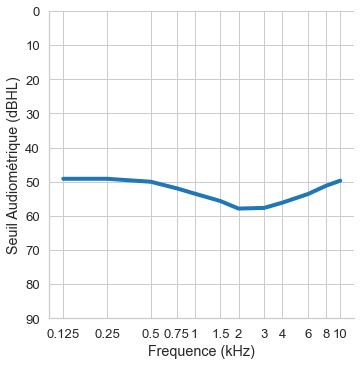

In [69]:
ticks=[.125,.25,.5,.75,1,1.5,2,3,4,6,8,10]
labels = [i for i in ticks]
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 4})
g = sns.relplot(
    data=df_moyenne,
    x="frequence", y="+anterieur ['-haut,+voise'] (S->z)",
    kind="line")
g.set_axis_labels("Frequence (kHz)", "Seuil Audiométrique (dBHL)")
g.set(ylim=(90,0),xscale="log",xticks = ticks,xticklabels = labels)

In [87]:
result.columns = ['id_audiogramme', 'phoneme_cible', 'phoneme_reconnu', 'frequence',
       'seuil', 'categorie', 'trait', 'erreur', 'trait_phonetique',
       'anterieur_p', 'arriere_p', 'continu_p', 'coronal_p', 'haut_p', 'nasal_p',
       'sonant_p', 'voise_p', 'anterieur_n', 'arriere_n', 'continu_n', 'coronal_n',
       'haut_n', 'nasal_n', 'sonant_n', 'voise_n']

In [156]:
result['moyen']=result.groupby(['trait_phonetique','frequence'])['seuil'].transform('mean')

In [165]:
result=result[['frequence',
       'seuil', 'trait', 'erreur',
       'anterieur_p', 'arriere_p', 'continu_p', 'coronal_p', 'haut_p',
       'nasal_p', 'sonant_p', 'voise_p', 'anterieur_n', 'arriere_n',
       'continu_n', 'coronal_n', 'haut_n', 'nasal_n', 'sonant_n', 'voise_n',
       'moyen']]

In [166]:
result

frequence  seuil       trait erreur  anterieur_p  arriere_p  \
0           0.125      0    -continu     Zb            0          0   
1           0.125      0    +coronal     mn            0          0   
2           0.125      0    -continu     Sp            0          0   
3           0.125      0    -coronal     db            0          0   
4           0.125      0    -continu     fp            0          0   
...           ...    ...         ...    ...          ...        ...   
817302     10.000     30  -anterieur     nk            0          0   
817478     10.000     35  -anterieur     nk            0          0   
817516     10.000     20  -anterieur     nk            0          0   
818344     10.000     50  -anterieur     nk            0          0   
818519     10.000     35  -anterieur     nk            0          0   

        continu_p  coronal_p  haut_p  nasal_p  ...  voise_p  anterieur_n  \
0               0          0       0        0  ...        0            0   
1               0          1       0        0  ...        0            0   
2               0          0       0        0  ...        0            0   
3               0          0       0        0  ...        0            0   
4               0          0       0        0  ...        0            0   
...           ...        ...     ...      ...  ...      ...          ...   
817302          0          0       0        0  ...        0            1   
817478          0          0       0        0  ...        0            1   
817516          0          0       0        0  ...        0            1   
818344          0          0       0        0  ...        0            1   
818519          0          0       0        0  ...        0            1   

        arriere_n  continu_n  coronal_n  haut_n  nasal_n  sonant_n  voise_n  \
0               0          1          0       0        0         0        0   
1               0          0          0       0        0         0        0   
2               0          1          0       0        0         0        0   
3               0          0          1       0        0         0        0   
4               0          1          0       0        0         0        0   
...           ...        ...        ...     ...      ...       ...      ...   
817302          0          0          0       0        0         0        0   
817478          0          0          0       0        0         0        0   
817516          0          0          0       0        0         0        0   
818344          0          0          0       0        0         0        0   
818519          0          0          0       0        0         0        0   

            moyen  
0       33.635487  
1       42.430556  
2       33.635487  
3       43.766705  
4       33.635487  
...           ...  
817302  29.078450  
817478  29.078450  
817516  29.078450  
818344  29.078450  
818519  29.078450  

[294504 rows x 21 columns]

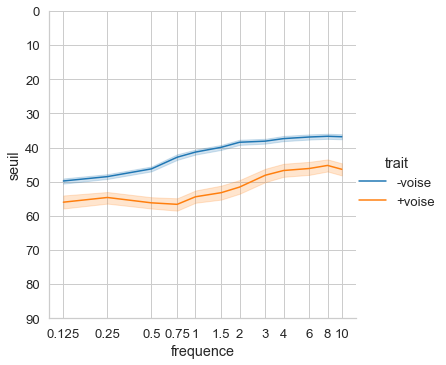

In [278]:
ticks=[.125,.25,.5,.75,1,1.5,2,3,4,6,8,10]
labels = [i for i in ticks]
sns.set_style("whitegrid")
a=sns.relplot(data=voise, x="frequence", y="seuil", hue="trait",kind="line")
a.set(ylim=(90,0),xscale="log",xticks = ticks,xticklabels = labels)

In [270]:
df_new=(df3.category1 + '|' + df3.category2 + '|' +df3.category3 + '|' +df3.category4 + '|' + df3.category5 + '|' + df3.category6 + '|' + df3.category7 + '|' +df3.category8).str.get_dummies()

In [307]:
str(voise.frequence.value_counts())

'4.000     4528\n8.000     4528\n2.000     4528\n0.125     4528\n3.000     4528\n0.250     4528\n1.500     4528\n6.000     4528\n0.750     4528\n10.000    4528\n1.000     4528\n0.500     4528\nName: frequence, dtype: int64'

In [ ]:
4.000,8.000,2.000,0.125,3.000,0.250,1.500,6.000,0.750,10.000,1.000,0.500 

In [ ]:
'0.125','0.250','0.500','0.750','1.000','1.500','2.000','3.000','4.000','6.000','8.000','10.000'

In [344]:
#del new3['New']
new3

id_audiogramme phoneme_cible phoneme_reconnu  frequence  seuil  \
0                   1             Z               b      0.125      0   
1                   1             m               n      0.125      0   
2                   1             S               p      0.125      0   
3                   1             d               b      0.125      0   
4                   1             f               p      0.125      0   
...               ...           ...             ...        ...    ...   
817302            799             n               k     10.000     30   
817478            815             n               k     10.000     35   
817516            819             n               k     10.000     20   
818344            896             n               k     10.000     50   
818519            912             n               k     10.000     35   

        categorie       trait erreur                      trait_phonetique  
0         continu    -continu     Zb                       -continu (f->p)  
1         coronal    +coronal     mn                       +coronal (b->d)  
2         continu    -continu     Sp                       -continu (f->p)  
3         coronal    -coronal     db                       -coronal (d->b)  
4         continu    -continu     fp                       -continu (f->p)  
...           ...         ...    ...                                   ...  
817302  anterieur  -anterieur     nk  -anterieur ['+haut,+continu'] (d->Z)  
817478  anterieur  -anterieur     nk  -anterieur ['+haut,+continu'] (d->Z)  
817516  anterieur  -anterieur     nk  -anterieur ['+haut,+continu'] (d->Z)  
818344  anterieur  -anterieur     nk  -anterieur ['+haut,+continu'] (d->Z)  
818519  anterieur  -anterieur     nk  -anterieur ['+haut,+continu'] (d->Z)  

[294504 rows x 9 columns]

In [443]:
df1.dtypes

0
id_audiogramme     object
seuil_125          object
seuil_250          object
seuil_500          object
seuil_750          object
seuil_1000         object
seuil_1500         object
seuil_2000         object
seuil_3000         object
seuil_4000         object
seuil_6000         object
seuil_8000         object
seuil_10000        object
phoneme_cible      object
phoneme_reconnu    object
phoneme_correct    object
erreurs_phono      object
dtype: object

In [670]:
df1

0     id_audiogramme seuil_125 seuil_250 seuil_500 seuil_750 seuil_1000  \
1                  1         0         0         0        20         30   
2                  1         0         0         0        20         30   
3                  1         0         0         0        20         30   
4                  1         0         0         0        20         30   
5                  1         0         0         0        20         30   
...              ...       ...       ...       ...       ...        ...   
11972            998        90        90        90        90         65   
11973            998        90        90        90        90         65   
11974            998        90        90        90        90         65   
11975            998        90        90        90        90         65   
11976            998        90        90        90        90         65   

0     seuil_1500 seuil_2000 seuil_3000 seuil_4000 seuil_6000 seuil_8000  \
1             50         65         75         80         85         60   
2             50         65         75         80         85         60   
3             50         65         75         80         85         60   
4             50         65         75         80         85         60   
5             50         65         75         80         85         60   
...          ...        ...        ...        ...        ...        ...   
11972         45         30         45         20         30         20   
11973         45         30         45         20         30         20   
11974         45         30         45         20         30         20   
11975         45         30         45         20         30         20   
11976         45         30         45         20         30         20   

0     seuil_10000 phoneme_cible phoneme_reconnu phoneme_correct  \
1              40             b               b               1   
2              40             Z               b               0   
3              40             m               n               0   
4              40             S               p               0   
5              40             g               g               1   
...           ...           ...             ...             ...   
11972          15             l               S               0   
11973          15             k               S               0   
11974          15             n               f               0   
11975          15             p               f               0   
11976          15             R               s               0   

0                                          erreurs_phono  
1                                                    NaN  
2                   [-continu#-coronal#-haut#+anterieur]  
3                                             [+coronal]  
4                   [-continu#-coronal#-haut#+anterieur]  
5                                                    NaN  
...                                                  ...  
11972                  [-sonant#-voise#+haut#-anterieur]  
11973                       [+continu#+coronal#-arriere]  
11974                   [-sonant#-voise#-coronal#-nasal]  
11975                                         [+continu]  
11976  [-sonant#-voise#+coronal#-haut#-arriere#+anter...  

[11976 rows x 17 columns]

In [447]:
pourcentage=pd.DataFrame(100*df1.groupby(['id_audiogramme', 'phoneme_correct']).size() / df1.groupby(['id_audiogramme']).size())
pourcentage
pourcentage.to_csv('pourcentage.csv') 
pourcentage=pd.read_csv('pourcentage.csv' , sep=',' , header=None)
pourcentage.columns = pourcentage.iloc[0]
pourcentage=pd.DataFrame(pourcentage)
pourcentage=pourcentage.drop(pourcentage.index[0])
pourcentage.columns=['id_audiogramme', 'phoneme_correct','pourcentage']
pourcentage

id_audiogramme phoneme_correct  pourcentage
1                 1               0    75.000000
2                 1               1    25.000000
3                10               0    41.666667
4                10               1    58.333333
5               100               0    16.666667
...             ...             ...          ...
1867            996               0   100.000000
1868            997               0    83.333333
1869            997               1    16.666667
1870            998               0    83.333333
1871            998               1    16.666667

[1871 rows x 3 columns]

In [639]:
new4

id_audiogramme  frequence  threshold    category  erreur mot
0                    1      0.125          0  +anterieur       1  Zb
1                    1      0.125          0  +anterieur       0  mn
2                    1      0.125          0  +anterieur       1  Sp
3                    1      0.125          0  +anterieur       0  db
4                    1      0.125          0  +anterieur       0  fp
...                ...        ...        ...         ...     ...  ..
1638907            998     10.000         15      -voise       1  lS
1638908            998     10.000         15      -voise       0  kS
1638909            998     10.000         15      -voise       1  nf
1638910            998     10.000         15      -voise       0  pf
1638911            998     10.000         15      -voise       1  Rs

[1432512 rows x 6 columns]

In [738]:
df_pourcentage=pourcentage.loc[(pourcentage['pourcentage'] >50)& (pourcentage['phoneme_correct'] == '1') ]
df_pourcentage

id_audiogramme phoneme_correct  pourcentage
4                10               1    58.333333
6               100               1    83.333333
10              102               1    91.666667
18              106               1    66.666667
20              107               1    58.333333
...             ...             ...          ...
1694             90               1    66.666667
1712             91               1    58.333333
1764             94               1    91.666667
1785             95               1    75.000000
1857             99               1    66.666667

[164 rows x 3 columns]

In [739]:
new4=new3[new3.set_index(['id_audiogramme']).index.isin(df_pourcentage.set_index(['id_audiogramme']).index)]
new4
#new4.to_csv('new4.csv') 

id_audiogramme  frequence  seuil   categorie  erreur  \
10                   2      0.125      0  +anterieur       0   
11                   2      0.125      0  +anterieur       0   
12                   2      0.125      0  +anterieur       0   
13                   2      0.125      0  +anterieur       0   
14                   2      0.125      0  +anterieur       1   
...                ...        ...    ...         ...     ...   
2262807            679     10.000     75      -voise       0   
2262808            679     10.000     75      -voise       1   
2262809            679     10.000     75      -voise       1   
2262810            679     10.000     75      -voise       0   
2262811            679     10.000     75      -voise       0   

                                    exemple      trait  
10       +anterieur ['-haut,+voise'] (S->z)  anterieur  
11       +anterieur ['-haut,+voise'] (S->z)  anterieur  
12       +anterieur ['-haut,+voise'] (S->z)  anterieur  
13       +anterieur ['-haut,+voise'] (S->z)  anterieur  
14       +anterieur ['-haut,+voise'] (S->z)  anterieur  
...                                     ...        ...  
2262807                       -voise (Z->S)      voise  
2262808                       -voise (Z->S)      voise  
2262809                       -voise (Z->S)      voise  
2262810                       -voise (Z->S)      voise  
2262811                       -voise (Z->S)      voise  

[305280 rows x 7 columns]

In [606]:
ds_mot["mot"].replace({'gf':'1','kv':'2','Rf':'3','Rs':'4','pR':'5','np':'6','lg':'7','mS':'8','Rz':'9','Zp':'10','gs':'10','nR':'11','lk':'12','nS':'13','fR':'14','nk':'15','RS':'16','dk':'17','bS':'18','nb':'19','Rp':'20','nf':'21','dR':'22'
                                                                                            ,'mk':'23','mZ':'24','kz':'25','Rv':'26','gl':'27','bR':'28','gn':'29','Zk':'30','gm':'31','gz':'32','nt':'33','dS':'34','mR':'35','gS':'36'
                                                                                                                                                    ,'kf':'37','Zf':'38','ks':'39','kl':'40'}, inplace=True)

In [612]:
initial_value = 1
ds_mot['Counter'] = range(initial_value, len(ds_mot) +initial_value)

In [621]:
ds_mot1=ds_mot[["Counter","mot"]].T
ds_mot1
ds_mot1.columns = ds_mot1.iloc[0]
ds_mot1=pd.DataFrame(ds_mot1)
ds_mot1=ds_mot1.drop(ds_mot1.index[0])
ds_mot1
ds_mot1.to_csv('ds_mot1.csv') 

In [580]:
ds_mot=ds_mot.sort_values(by ='id_audiogramme')
ds_mot

0    id_audiogramme mot
124              29  Rf
116              47  Rf
182              67  Rf
211              69  Rf
307             105  fR
..              ...  ..
344             994  Rs
231             995  gz
329             996  kv
353             997  gs
346             998  Rs

[453 rows x 2 columns]

In [675]:
ds_mot[ds_mot.set_index(['id_audiogramme']).index.isin(moyenne_audiogram1.set_index(['id_audiogramme']).index)]

0     id_audiogramme mot
1                151  RS
2                188  RS
3                200  RS
4                205  RS
5                243  RS
...              ...  ..
89522            764  pz
89523            808  pz
89527            683  pz
89528            764  pz
89529            808  pz

[65580 rows x 2 columns]

In [659]:
ds_mot.id_audiogramme=ds_mot.id_audiogramme.astype('str')

In [660]:
ds_mot0=ds_mot[ds_mot.set_index(['id_audiogramme']).index.isin(moyenne_audiogram1.set_index(['id_audiogramme']).index)]
ds_mot0

0     id_audiogramme mot
1                151  RS
2                188  RS
3                200  RS
4                205  RS
5                243  RS
...              ...  ..
89522            764  pz
89523            808  pz
89527            683  pz
89528            764  pz
89529            808  pz

[65580 rows x 2 columns]

In [662]:
ds_mot0.id_audiogramme.value_counts()

552    144
578    144
575    144
808    144
765    144
      ... 
109     84
767     84
398     84
382     84
712     84
Name: id_audiogramme, Length: 577, dtype: int64

In [456]:
new3[new3.set_index(['id_audiogramme']).index.isin(df_pourcentage.set_index(['id_audiogramme']).index)]


id_audiogramme phoneme_correct  pourcentage
15              105               0    83.333333
73              131               0    83.333333
93              140               0    91.666667
95              141               0    83.333333
107             147               0    91.666667
...             ...             ...          ...
1863            994               0    83.333333
1865            995               0    91.666667
1867            996               0   100.000000
1868            997               0    83.333333
1870            998               0    83.333333

[453 rows x 3 columns]

In [584]:
ds

id_audiogramme  frequence  threshold    category  erreur mot
141                 29      0.125          0  +anterieur       1  gb
145                 29      0.125          0  +anterieur       1  kp
147                 29      0.125          0  +anterieur       1  Rf
254                 47      0.125          0  +anterieur       1  Zb
256                 47      0.125          0  +anterieur       1  Sp
...                ...        ...        ...         ...     ...  ..
1638904            998     10.000         15      -voise       1  mf
1638905            998     10.000         15      -voise       1  gS
1638907            998     10.000         15      -voise       1  lS
1638909            998     10.000         15      -voise       1  nf
1638911            998     10.000         15      -voise       1  Rs

[180036 rows x 6 columns]

In [484]:
ds.loc[ds.index.isin(['+anterieur', '+arriere', '+continu', '+coronal', '+haut', '+nasal',
       '+sonant', '+voise', '-anterieur', '-arriere', '-continu', '-coronal',
       '-haut', '-nasal', '-sonant', '-voise'])]

id_audiogramme  frequence  threshold  erreur mot
category                                                   
+anterieur             29      0.125          0       0  bv
+anterieur             29      0.125          0       0  mn
+anterieur             29      0.125          0       0  Sk
+anterieur             29      0.125          0       1  gb
+anterieur             29      0.125          0       0  db
...                   ...        ...        ...     ...  ..
-voise                998     10.000         15       1  lS
-voise                998     10.000         15       0  kS
-voise                998     10.000         15       1  nf
-voise                998     10.000         15       0  pf
-voise                998     10.000         15       1  Rs

[950976 rows x 5 columns]

In [569]:
ds.groupby(["mot",'id_audiogramme']).size().sort_values().groupby(level=0).tail(1).reset_index()

mot id_audiogramme   0
0    ln            204  12
1    dt            854  12
2    bp            530  12
3    db             69  12
4    mn            140  12
..   ..            ...  ..
119  kl            455  84
120  mk            904  84
121  lk            682  84
122  gn            446  84
123  nk            754  96

[124 rows x 3 columns]

In [640]:
ds=new4.set_index(['category'])
ds
#df.loc[df.index.isin(['one','two'])]

id_audiogramme  frequence  threshold  erreur mot
category                                                   
+anterieur              1      0.125          0       1  Zb
+anterieur              1      0.125          0       0  mn
+anterieur              1      0.125          0       1  Sp
+anterieur              1      0.125          0       0  db
+anterieur              1      0.125          0       0  fp
...                   ...        ...        ...     ...  ..
-voise                998     10.000         15       1  lS
-voise                998     10.000         15       0  kS
-voise                998     10.000         15       1  nf
-voise                998     10.000         15       0  pf
-voise                998     10.000         15       1  Rs

[1432512 rows x 5 columns]

In [547]:
new4.mot.value_counts()

pf    44352
bf    41280
df    40128
kf    39168
mf    37248
      ...  
pZ      384
pk      384
Zn      192
kl      192
gm      192
Name: mot, Length: 124, dtype: int64

In [650]:
ds_mot=ds.groupby(['mot','frequence','id_audiogramme']).mean()
ds_mot

threshold  erreur
mot frequence id_audiogramme                   
RS  0.125     151                    10       1
              188                    15       1
              200                    15       1
              205                    15       1
              243                    20       1
...                                 ...     ...
pz  10.000    764                    90       1
              808                    35       1
              875                    80       1
              876                    75       1
              901                    65       1

[89532 rows x 2 columns]

In [647]:
ds=new4.groupby(['id_audiogramme','erreur']).category.value_counts()
ds.to_csv('ds.csv') 
ds=pd.read_csv('ds.csv' , sep=',' , header=None)
ds.columns = ds.iloc[0]
ds=pd.DataFrame(ds)
ds=ds.drop(ds.index[0])
ds

0     id_audiogramme erreur    category category
1                  1      0    +arriere      108
2                  1      0    +continu      108
3                  1      0       +haut      108
4                  1      0     +sonant      108
5                  1      0      +voise      108
...              ...    ...         ...      ...
19760            998      1      -nasal       24
19761            998      1  +anterieur       12
19762            998      1    +arriere       12
19763            998      1     +sonant       12
19764            998      1       -haut       12

[19764 rows x 4 columns]

In [648]:
ds=new4.loc[(new4['erreur'] == 1) ]
ds

id_audiogramme  frequence  threshold    category  erreur mot
0                    1      0.125          0  +anterieur       1  Zb
2                    1      0.125          0  +anterieur       1  Sp
6                    1      0.125          0  +anterieur       1  kp
8                    1      0.125          0  +anterieur       1  Rp
18                   5      0.125          0  +anterieur       1  Zz
...                ...        ...        ...         ...     ...  ..
1638904            998     10.000         15      -voise       1  mf
1638905            998     10.000         15      -voise       1  gS
1638907            998     10.000         15      -voise       1  lS
1638909            998     10.000         15      -voise       1  nf
1638911            998     10.000         15      -voise       1  Rs

[266160 rows x 6 columns]

In [666]:
ds_mot0.groupby(["mot"]).count()

0    id_audiogramme
mot                
RS              636
RZ               12
Rf             1752
Rk               48
Rp              252
..              ...
pf             2136
pk               24
pl               12
pv              588
pz               36

[136 rows x 1 columns]

In [651]:
#ds_mot=ds.groupby(["id_audiogramme","mot"]).count()
ds_mot.to_csv('ds_mot.csv') 
ds_mot=pd.read_csv('ds_mot.csv' , sep=',' , header=None)
ds_mot.columns = ds_mot.iloc[0]
ds_mot=pd.DataFrame(ds_mot)
ds_mot=ds_mot.drop(ds_mot.index[0])
ds_mot=ds_mot[['id_audiogramme','mot']]
ds_mot

0     id_audiogramme mot
1                151  RS
2                188  RS
3                200  RS
4                205  RS
5                243  RS
...              ...  ..
89528            764  pz
89529            808  pz
89530            875  pz
89531            876  pz
89532            901  pz

[89532 rows x 2 columns]

In [652]:
ds_mot
ds_mot[["id_audiogramme"]] = ds_mot[["id_audiogramme"]].apply(pd.to_numeric)

In [576]:
ds_mot.to_csv('ds_mot.csv') 

In [588]:
moyenne_audiogram_n=new4.groupby(['id_audiogramme',"erreur",'frequence','mot']).mean()
moyenne_audiogram_n.to_csv('moyenne_audiogram_n.csv') 
moyenne_audiogram_n=pd.read_csv('moyenne_audiogram_n.csv' , sep=',' , header=None)
moyenne_audiogram_n.columns = moyenne_audiogram_n.iloc[0]
moyenne_audiogram_n=pd.DataFrame(moyenne_audiogram_n)
moyenne_audiogram_n=moyenne_audiogram_n.drop(moyenne_audiogram_n.index[0])
moyenne_audiogram_n.columns=['id_audiogramme', 'erreur','frequence',mot,'seuil']
moyenne_audiogram_n

threshold
id_audiogramme erreur frequence mot           
105            0      0.125     SR          10
                                Zb          10
                                bR          10
                                dp          10
                                fR          10
...                                        ...
998            1      10.000    kS          15
                                lS          15
                                mf          15
                                nf          15
                                pf          15

[118872 rows x 1 columns]

In [654]:
moyenne_audiogram=new4.groupby(['id_audiogramme',"erreur",'frequence','mot']).mean()
moyenne_audiogram.to_csv('moyenne_audiogram.csv') 
moyenne_audiogram=pd.read_csv('moyenne_audiogram.csv' , sep=',' , header=None)
moyenne_audiogram.columns = moyenne_audiogram.iloc[0]
moyenne_audiogram=pd.DataFrame(moyenne_audiogram)
moyenne_audiogram=moyenne_audiogram.drop(moyenne_audiogram.index[0])
moyenne_audiogram.columns=['id_audiogramme', 'erreur','frequence','mot','seuil']
moyenne_audiogram

id_audiogramme erreur frequence mot seuil
1                   1      0     0.125  Rp     0
2                   1      0     0.125  Sp     0
3                   1      0     0.125  Zb     0
4                   1      0     0.125  db     0
5                   1      0     0.125  fp     0
...               ...    ...       ...  ..   ...
179060            998      1      10.0  kS    15
179061            998      1      10.0  lS    15
179062            998      1      10.0  mf    15
179063            998      1      10.0  nf    15
179064            998      1      10.0  pf    15

[179064 rows x 5 columns]

In [655]:
moyenne_audiogram1=moyenne_audiogram.loc[(moyenne_audiogram['erreur'] == '1') ]
moyenne_audiogram1

id_audiogramme erreur frequence mot seuil
109                 1      1     0.125  Rp     0
110                 1      1     0.125  Sp     0
111                 1      1     0.125  Zb     0
112                 1      1     0.125  db     0
113                 1      1     0.125  fp     0
...               ...    ...       ...  ..   ...
131067            817      1      0.25  ls    65
131068            817      1      0.25  mR    65
131069            817      1      0.25  nR    65
131070            817      1      0.25  pR    65
131071            817      1       0.5  ZS    50

[65491 rows x 5 columns]

In [553]:
#moyenne_audiogram1pivot.to_csv('moyenne_audiogram1pivot.csv') 
ds_mot.to_csv('ds_mot.csv') 


In [532]:
moyenne_audiogram0=moyenne_audiogram.loc[(moyenne_audiogram['erreur'] == '0') ]
moyenne_audiogram0

id_audiogramme erreur frequence seuil
13               105      1     0.125    10
14               105      1      0.25    10
15               105      1       0.5    20
16               105      1      0.75     5
17               105      1       1.0     0
...              ...    ...       ...   ...
10868            998      1       3.0    45
10869            998      1       4.0    20
10870            998      1       6.0    30
10871            998      1       8.0    20
10872            998      1      10.0    15

[5436 rows x 4 columns]

In [632]:
ds_mot=ds_mot1.T

<AxesSubplot:xlabel='mot', ylabel='count'>

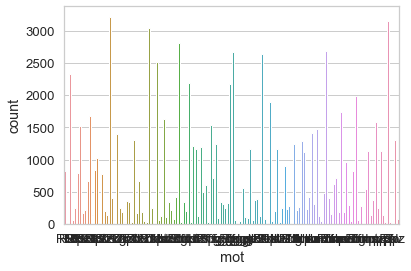

In [663]:
sns.countplot('mot',data=ds_mot)

In [657]:
moyenne_audiogram1[["frequence","seuil"]] = moyenne_audiogram1[["frequence","seuil"]].apply(pd.to_numeric)
moyenne_audiogram1.dtypes

id_audiogramme     object
erreur             object
frequence         float64
mot                object
seuil               int64
dtype: object

In [526]:
moyenne_audiogram0[["frequence","seuil"]] = moyenne_audiogram0[["frequence","seuil"]].apply(pd.to_numeric)
moyenne_audiogram0

id_audiogramme erreur  frequence  seuil
1                105      0      0.125     10
2                105      0      0.250     10
3                105      0      0.500     20
4                105      0      0.750      5
5                105      0      1.000      0
...              ...    ...        ...    ...
10856            998      0      3.000     45
10857            998      0      4.000     20
10858            998      0      6.000     30
10859            998      0      8.000     20
10860            998      0     10.000     15

[5436 rows x 4 columns]

In [677]:
moyenne_audiogram1.mot.value_counts()

ZS    2319
gk    2306
bp    2304
pf    2136
bf    2040
      ... 
pZ      12
gm      12
fl      12
kn      12
bl      12
Name: mot, Length: 136, dtype: int64

In [680]:
moyenne_audiogram1pivot=moyenne_audiogram1.pivot_table(index=['id_audiogramme','mot'], columns='frequence', values='seuil')
moyenne_audiogram1pivot

frequence           0.125   0.250   0.500   0.750   1.000   1.500   2.000   \
id_audiogramme mot                                                           
1              Rp      0.0     0.0     0.0    20.0    30.0    50.0    65.0   
               Sp      0.0     0.0     0.0    20.0    30.0    50.0    65.0   
               Zb      0.0     0.0     0.0    20.0    30.0    50.0    65.0   
               db      0.0     0.0     0.0    20.0    30.0    50.0    65.0   
               fp      0.0     0.0     0.0    20.0    30.0    50.0    65.0   
...                    ...     ...     ...     ...     ...     ...     ...   
817            gk     70.0    65.0     NaN     NaN     NaN     NaN     NaN   
               ls     70.0    65.0     NaN     NaN     NaN     NaN     NaN   
               mR     70.0    65.0     NaN     NaN     NaN     NaN     NaN   
               nR     70.0    65.0     NaN     NaN     NaN     NaN     NaN   
               pR     70.0    65.0     NaN     NaN     NaN     NaN     NaN   

frequence           3.000   4.000   6.000   8.000   10.000  
id_audiogramme mot                                          
1              Rp     75.0    80.0    85.0    60.0    40.0  
               Sp     75.0    80.0    85.0    60.0    40.0  
               Zb     75.0    80.0    85.0    60.0    40.0  
               db     75.0    80.0    85.0    60.0    40.0  
               fp     75.0    80.0    85.0    60.0    40.0  
...                    ...     ...     ...     ...     ...  
817            gk      NaN     NaN     NaN     NaN     NaN  
               ls      NaN     NaN     NaN     NaN     NaN  
               mR      NaN     NaN     NaN     NaN     NaN  
               nR      NaN     NaN     NaN     NaN     NaN  
               pR      NaN     NaN     NaN     NaN     NaN  

[5465 rows x 12 columns]

In [681]:
5465/577

9.471403812824956

In [22]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy 
import matplotlib.ticker as ticker
df = pd.read_csv('df5000.csv' , sep=',' , header=None)
df.loc[-1] = df.columns.values
df.sort_index(inplace=True)
df.reset_index(drop=True, inplace=True)
df = df.iloc[1:]
df.index = df.index -1
df_fin=df.T
df_fin=df_fin.iloc[1:]
df_fin.index = df_fin.index -1
df_fin=df_fin.T
df_fin

0   1   2   3   4   5   6   7   8   9   10  11
0      5  10  10  15  10  25   0   0  20  25  15  25
1     85  60  50  45  45  35  45  45  40  15  15  25
2      0   0  15   0   5  10  30  45  25  10  30   5
3     35  50  60  35  55  45  30  10   5  20  25  30
4     25  30  15  35  30  45  65  80  70  60  60  60
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
5095  45  55  60  80  85  90  80  55  35  10   5  25
5096  25   0  20  15   0  20   5  10  10  20  35  10
5097   5  15  10  25  20  10  30   5  15  25  15  35
5098  25  15   0   5   5  10   0   5  25   0   0   0
5099   5  15  25  25  20  25  45  40  20  20  10  15

[5100 rows x 12 columns]

In [23]:
df_fin['counter'] = range(len(df_fin))
df_fin

0   1   2   3   4   5   6   7   8   9  10  11  counter
0      5  10  10  15  10  25   0   0  20  25  15  25        0
1     85  60  50  45  45  35  45  45  40  15  15  25        1
2      0   0  15   0   5  10  30  45  25  10  30   5        2
3     35  50  60  35  55  45  30  10   5  20  25  30        3
4     25  30  15  35  30  45  65  80  70  60  60  60        4
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..      ...
5095  45  55  60  80  85  90  80  55  35  10   5  25     5095
5096  25   0  20  15   0  20   5  10  10  20  35  10     5096
5097   5  15  10  25  20  10  30   5  15  25  15  35     5097
5098  25  15   0   5   5  10   0   5  25   0   0   0     5098
5099   5  15  25  25  20  25  45  40  20  20  10  15     5099

[5100 rows x 13 columns]

In [25]:
df_fin.columns=['0.125', '0.250','0.5','.75','1','1.5','2','3','4','6','8','1','counter']
df_fin=df_fin.melt(id_vars=['counter'], 
        var_name="frequence", 
        value_name="threshold")
df_fin

counter frequence  threshold
0            0     0.125          5
1            1     0.125         85
2            2     0.125          0
3            3     0.125         35
4            4     0.125         25
...        ...       ...        ...
61195     5095         1         25
61196     5096         1         10
61197     5097         1         35
61198     5098         1          0
61199     5099         1         15

[61200 rows x 3 columns]

In [26]:
df_fin[["frequence","threshold"]] = df_fin[["frequence","threshold"]].apply(pd.to_numeric)
df_fin.dtypes

counter        int64
frequence    float64
threshold      int64
dtype: object

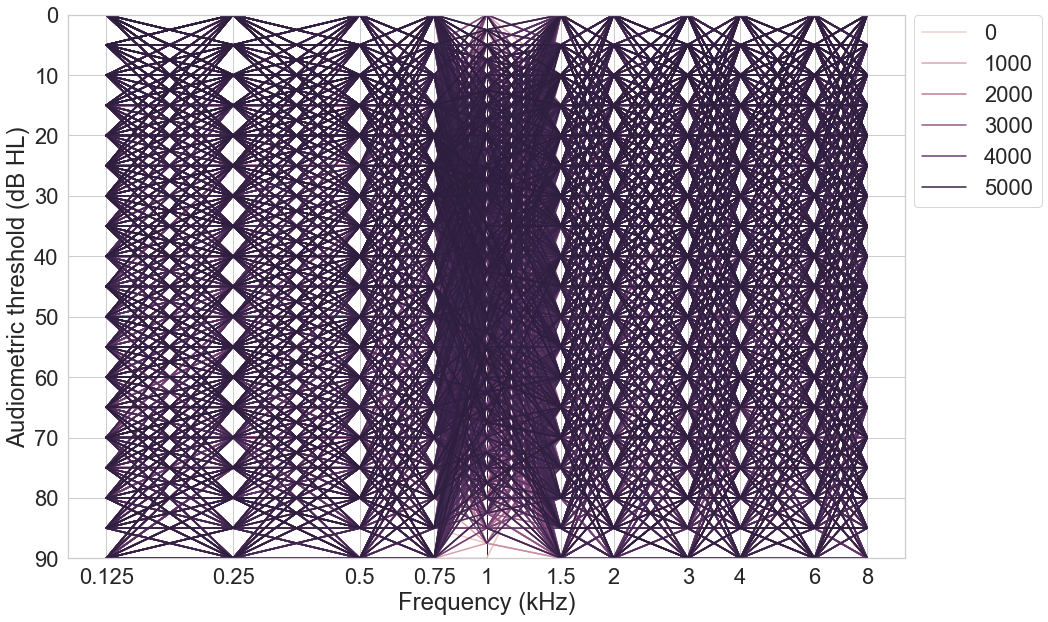

In [27]:
ticks=[.125,.25,.5,.75,1,1.5,2,3,4,6,8]
labels = [i for i in ticks]
sn.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(15, 10))
sn.set_context("notebook", font_scale=2, rc={"lines.linew3idth": 4})
g=sn.lineplot(
    data=df_fin,
    x="frequence", y="threshold", hue="counter",dashes=False,markersize=14)
ax.set_xlabel('Frequency (kHz)')
ax.set_ylabel('Audiometric threshold (dB HL)')
ax.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
#g.set_axis_labels("Frequence (kHz)", "Seuil Audiométrique (dBHL)")
g.set(ylim=(90,0),xscale="log",xticks = ticks,xticklabels = labels)
#plt.savefig('plot4.png', dpi=300, bbox_inches='tight')
plt.show()